.. _nb_callback:

## Callback

A `Callback` class can be used to receive a notification of the algorithm object each generation.
This can be useful to track metrics, do additional calculations, or even modify the algorithm object during the run.
The latter is only recommended for experienced users.

The example below implements a less memory-intense version of keeping track of the convergence. A posteriori analysis can one the one hand, be done by using the `save_history=True` option. This, however, stores a deep copy of the `Algorithm` object in each iteration. This might be more information than necessary, and thus, the `Callback` allows to select only the information necessary to be analyzed when the run has terminated. Another good use case can be to visualize data in each iteration in real-time.

n_gen |  n_eval |     fopt     |   fopt_gap   |     favg    
    1 |     100 |  0.387099336 |  0.387099336 |  0.831497479
    2 |     200 |  0.319748476 |  0.319748476 |  0.572952476
    3 |     300 |  0.177049310 |  0.177049310 |  0.460188746
    4 |     400 |  0.153187160 |  0.153187160 |  0.359821658
    5 |     500 |  0.153187160 |  0.153187160 |  0.285564533
    6 |     600 |  0.091601636 |  0.091601636 |  0.229228540
    7 |     700 |  0.089140805 |  0.089140805 |  0.191542777
    8 |     800 |  0.048367115 |  0.048367115 |  0.164030021
    9 |     900 |  0.048367115 |  0.048367115 |  0.141417181
   10 |    1000 |  0.037665111 |  0.037665111 |  0.115670337
   11 |    1100 |  0.030959690 |  0.030959690 |  0.088617428
   12 |    1200 |  0.028205795 |  0.028205795 |  0.070879018
   13 |    1300 |  0.017563331 |  0.017563331 |  0.056496062
   14 |    1400 |  0.012737458 |  0.012737458 |  0.046900982
   15 |    1500 |  0.012737458 |  0.012737458 |  0.039309099
   16 |    1600 |  0.008

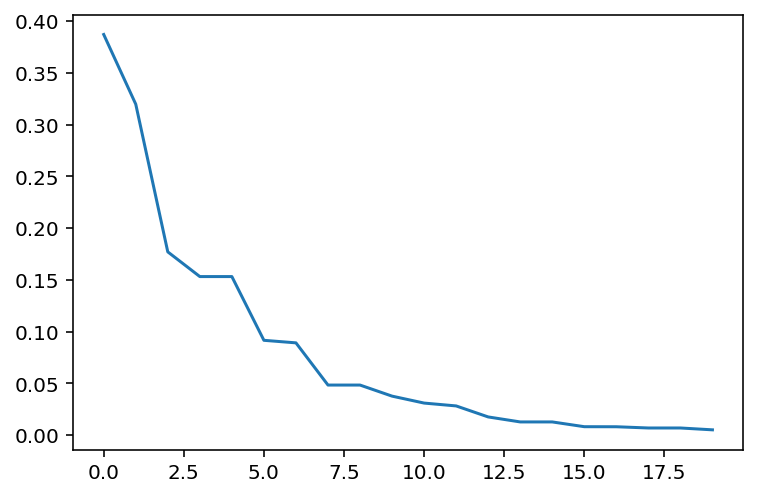

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_problem
from pymoo.model.callback import Callback
from pymoo.optimize import minimize


class MyCallback(Callback):

    def __init__(self) -> None:
        super().__init__()
        self.data["best"] = []

    def notify(self, algorithm):
        self.data["best"].append(algorithm.pop.get("F").min())


problem = get_problem("sphere")

algorithm = GA(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 20),
               seed=1,
               callback=MyCallback(),
               verbose=True)

val = res.algorithm.callback.data["best"]
plt.plot(np.arange(len(val)), val)
plt.show()



**Note** that the `Callback` object from the `Result` object needs to be accessed `res.algorithm.callback` because the original object keeps unmodified to ensure reproducibility.

For completeness, the history-based convergence analysis looks as follows:

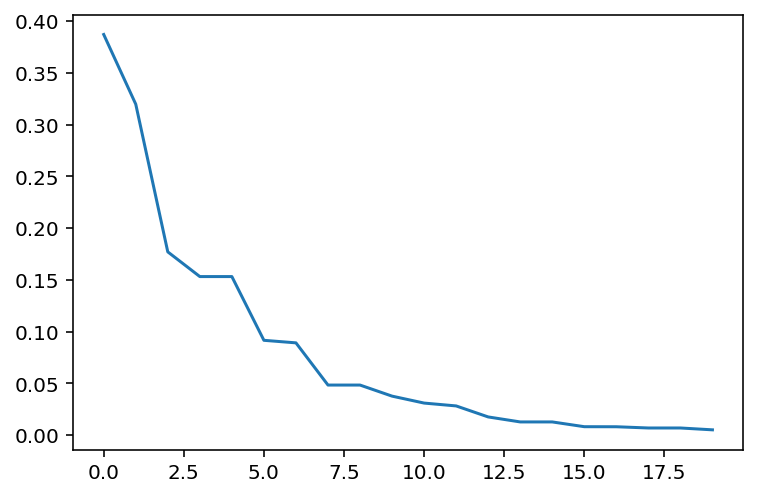

In [10]:
res = minimize(problem,
               algorithm,
               ('n_gen', 20),
               seed=1,
               save_history=True)

val = [e.opt.get("F")[0] for e in res.history]
plt.plot(np.arange(len(val)), val)
plt.show()